<a href="https://colab.research.google.com/github/HarshKubade/ML_Lab/blob/main/ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
tax_values = [100, 120, 130, 150, 180, 200, 220, 250, 400]


df = pd.DataFrame(tax_values, columns=['tax'])
df

,tax
0,100
1,120
2,130
3,150
4,180
5,200
6,220
7,250
8,400


In [ ]:
Q1 = df['tax'].quantile(0.25)
Q2 = df['tax'].median()
Q3 = df['tax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1: 130.0
Q2 (Median): 180.0
Q3: 220.0
IQR: 90.0
Lower Bound: -5.0
Upper Bound: 355.0


In [ ]:
outliers = df[(df['tax'] < lower_bound) | (df['tax'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
   tax
8  400


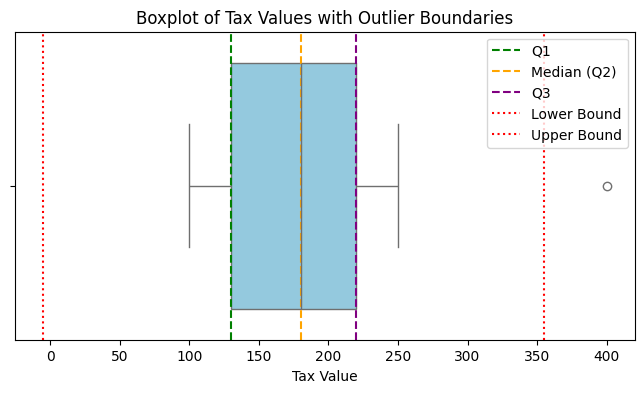

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tax'], color="skyblue")
plt.axvline(Q1, color='green', linestyle='--', label='Q1')
plt.axvline(Q2, color='orange', linestyle='--', label='Median (Q2)')
plt.axvline(Q3, color='purple', linestyle='--', label='Q3')
plt.axvline(lower_bound, color='red', linestyle=':', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle=':', label='Upper Bound')
plt.title("Boxplot of Tax Values with Outlier Boundaries")
plt.xlabel("Tax Value")
plt.legend()
plt.show()

In [ ]:
def encode_tax(tax_value, upper_bound):
  return 1 if tax_value > upper_bound else 0
def decode_encoded_tax(encoded_value):
  return "Outlier" if encoded_value == 1 else "Not Outlier"

In [ ]:
df['encoded_tax'] = df['tax'].apply(encode_tax, args=(upper_bound,))
display(df)

,tax,tax_encoded,encoded_tax
0,100,0,0
1,120,1,0
2,130,2,0
3,150,3,0
4,180,4,0
5,200,5,0
6,220,6,0
7,250,7,0
8,400,8,1


In [ ]:
tax_values = [0, 100, 120, 130, 150, 180, 200, 220, 250, 400]
df = pd.DataFrame(tax_values, columns=['tax'])

Q1 = df['tax'].quantile(0.25)
Q2 = df['tax'].median()
Q3 = df['tax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['encoded_tax'] = df['tax'].apply(encode_tax, args=(upper_bound,))
display(df)

,tax,encoded_tax
0,0,0
1,100,0
2,120,0
3,130,0
4,150,0
5,180,0
6,200,0
7,220,0
8,250,0
9,400,1


In [ ]:
import pandas as pd
from IPython.display import display

def encode_tax(tax_value, upper_bound):
  return 1 if tax_value > upper_bound else 0
tax_values = [0, 100, 120, 130, 150, 180, 200, 220, 250, 400]
df = pd.DataFrame(tax_values, columns=['tax'])
Q1 = df['tax'].quantile(0.25)
Q2 = df['tax'].median()
Q3 = df['tax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['encoded_tax'] = df['tax'].apply(encode_tax, args=(upper_bound,))
display(df)

,tax,encoded_tax
0,0,0
1,100,0
2,120,0
3,130,0
4,150,0
5,180,0
6,200,0
7,220,0
8,250,0
9,400,1


In [ ]:
df['decoded_tax'] = df['encoded_tax'].apply(decode_encoded_tax)
display(df)

,tax,encoded_tax,decoded_tax
0,0,0,Not Outlier
1,100,0,Not Outlier
2,120,0,Not Outlier
3,130,0,Not Outlier
4,150,0,Not Outlier
5,180,0,Not Outlier
6,200,0,Not Outlier
7,220,0,Not Outlier
8,250,0,Not Outlier
9,400,1,Outlier


In [ ]:
display(df)

,tax,encoded_tax,decoded_tax
0,0,0,Not Outlier
1,100,0,Not Outlier
2,120,0,Not Outlier
3,130,0,Not Outlier
4,150,0,Not Outlier
5,180,0,Not Outlier
6,200,0,Not Outlier
7,220,0,Not Outlier
8,250,0,Not Outlier
9,400,1,Outlier
